In [164]:
import pandas as pd
import numpy as np
import os
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier <- pip install xgboost
from sklearn.svm import SVC
from sklearn.svm import SVR # Support Vector Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline

In [165]:
data=pd.read_csv('C:/Users/User/machine_learning/data/btc_data.csv')
data.head(5)

Date  priceUSD  transactions     size  sentbyaddress  difficulty  \
0  2010/07/17    0.0495           235  649.653            390     181.543   
1  2010/07/18    0.0726           248  765.285            424     181.543   
2  2010/07/19    0.0859           354  756.040            553     181.543   
3  2010/07/20    0.0783           413  984.707            632     181.543   
4  2010/07/21    0.0767           256  542.483            440     181.543   

       hashrate  mining_profitability  sentinusdUSD  transactionfeesUSD  ...  \
0  2.775561e+09              154298.0        1193.0            0.000010  ...   
1  1.554461e+09              401834.0        2620.0            0.000243  ...   
2  1.551287e+09              481473.0        4048.0            0.000022  ...   
3  1.640430e+09              431831.0        2341.0            0.000000  ...   
4  1.723493e+09              460783.0        2122.0            0.000000  ...   

   price3rsiUSD  price7rsiUSD  price14rsiUSD  price30rsiUSD  price90rsiUSD  \
0         0.000           0.0            0.0            0.0            0.0   
1         0.000           0.0            0.0            0.0            0.0   
2         0.000           0.0            0.0            0.0            0.0   
3        82.751           0.0            0.0            0.0            0.0   
4        78.603           0.0            0.0            0.0            0.0   

   price3rocUSD  price7rocUSD  price14rocUSD  price30rocUSD  price90rocUSD  
0         0.000           0.0            0.0            0.0            0.0  
1         0.000           0.0            0.0            0.0            0.0  
2         0.000           0.0            0.0            0.0            0.0  
3        58.099           0.0            0.0            0.0            0.0  
4         5.652           0.0            0.0            0.0            0.0  

[5 rows x 737 columns]

In [166]:
data.dtypes

Date              object
priceUSD         float64
transactions       int64
size             float64
sentbyaddress      int64
                  ...   
price3rocUSD     float64
price7rocUSD     float64
price14rocUSD    float64
price30rocUSD    float64
price90rocUSD    float64
Length: 737, dtype: object

In [167]:
data.isna().sum()

Date             0
priceUSD         0
transactions     0
size             0
sentbyaddress    0
                ..
price3rocUSD     0
price7rocUSD     0
price14rocUSD    0
price30rocUSD    0
price90rocUSD    0
Length: 737, dtype: int64

In [168]:
data.fillna(0, inplace=True)

In [169]:
data["Date"][data["size"]>600]

0       2010/07/17
1       2010/07/18
2       2010/07/19
3       2010/07/20
7       2010/07/24
           ...    
3483    2020/01/29
3484    2020/01/30
3485    2020/01/31
3486    2020/02/01
3487    2020/02/02
Name: Date, Length: 3415, dtype: object

In [170]:
data["size"].max()

998092.0

In [171]:
data["transactions"].mean()

142945.7686353211

In [172]:
data.shape 

(3488, 737)

In [173]:
data.tail()

Date  priceUSD  transactions      size  sentbyaddress  \
3483  2020/01/29    9349.0        340402  706867.0         433958   
3484  2020/01/30    9394.0        332402  704883.0         416980   
3485  2020/01/31    9366.0        334290  770486.0         398021   
3486  2020/02/01    9393.0        303573  650769.0         338567   
3487  2020/02/02    9398.0        290736  684127.0         257655   

        difficulty      hashrate  mining_profitability  sentinusdUSD  \
3483  1.546610e+13  1.157542e+20                 0.163  8.336367e+09   
3484  1.546610e+13  1.253033e+20                 0.148  1.365361e+10   
3485  1.546610e+13  1.113635e+20                 0.153  1.126273e+10   
3486  1.546610e+13  1.201317e+20                 0.149  7.668679e+09   
3487  1.546610e+13  1.064910e+20                 0.159  6.486338e+09   

      transactionfeesUSD  ...  price3rsiUSD  price7rsiUSD  price14rsiUSD  \
3483               0.561  ...        93.577        80.644         73.588   
3484               0.555  ...        94.137        81.436         74.176   
3485               0.631  ...        87.140        79.116         73.100   
3486               0.541  ...        88.385        79.762         73.498   
3487               0.548  ...        88.689        79.897         73.576   

      price30rsiUSD  price90rsiUSD  price3rocUSD  price7rocUSD  price14rocUSD  \
3483         64.882         54.040        10.430         7.538          6.497   
3484         65.272         54.195         7.432        10.930          8.061   
3485         64.815         54.082         3.505        11.368          5.611   
3486         65.058         54.175         0.473        12.499          5.457   
3487         65.104         54.192         0.041        11.011          6.081   

      price30rocUSD  price90rocUSD  
3483         26.536          1.663  
3484         28.817          2.376  
3485         29.412          0.800  
3486         31.791          1.606  
3487         29.624          1.220  

[5 rows x 737 columns]

In [174]:
data.head()

Date  priceUSD  transactions     size  sentbyaddress  difficulty  \
0  2010/07/17    0.0495           235  649.653            390     181.543   
1  2010/07/18    0.0726           248  765.285            424     181.543   
2  2010/07/19    0.0859           354  756.040            553     181.543   
3  2010/07/20    0.0783           413  984.707            632     181.543   
4  2010/07/21    0.0767           256  542.483            440     181.543   

       hashrate  mining_profitability  sentinusdUSD  transactionfeesUSD  ...  \
0  2.775561e+09              154298.0        1193.0            0.000010  ...   
1  1.554461e+09              401834.0        2620.0            0.000243  ...   
2  1.551287e+09              481473.0        4048.0            0.000022  ...   
3  1.640430e+09              431831.0        2341.0            0.000000  ...   
4  1.723493e+09              460783.0        2122.0            0.000000  ...   

   price3rsiUSD  price7rsiUSD  price14rsiUSD  price30rsiUSD  price90rsiUSD  \
0         0.000           0.0            0.0            0.0            0.0   
1         0.000           0.0            0.0            0.0            0.0   
2         0.000           0.0            0.0            0.0            0.0   
3        82.751           0.0            0.0            0.0            0.0   
4        78.603           0.0            0.0            0.0            0.0   

   price3rocUSD  price7rocUSD  price14rocUSD  price30rocUSD  price90rocUSD  
0         0.000           0.0            0.0            0.0            0.0  
1         0.000           0.0            0.0            0.0            0.0  
2         0.000           0.0            0.0            0.0            0.0  
3        58.099           0.0            0.0            0.0            0.0  
4         5.652           0.0            0.0            0.0            0.0  

[5 rows x 737 columns]

In [175]:
data.columns

Index(['Date', 'priceUSD', 'transactions', 'size', 'sentbyaddress',
       'difficulty', 'hashrate', 'mining_profitability', 'sentinusdUSD',
       'transactionfeesUSD',
       ...
       'price3rsiUSD', 'price7rsiUSD', 'price14rsiUSD', 'price30rsiUSD',
       'price90rsiUSD', 'price3rocUSD', 'price7rocUSD', 'price14rocUSD',
       'price30rocUSD', 'price90rocUSD'],
      dtype='object', length=737)

In [176]:
data.priceUSD

0          0.0495
1          0.0726
2          0.0859
3          0.0783
4          0.0767
          ...    
3483    9349.0000
3484    9394.0000
3485    9366.0000
3486    9393.0000
3487    9398.0000
Name: priceUSD, Length: 3488, dtype: float64

In [177]:
data[["transactions"]]

transactions
0              235
1              248
2              354
3              413
4              256
...            ...
3483        340402
3484        332402
3485        334290
3486        303573
3487        290736

[3488 rows x 1 columns]

In [178]:
data[["transactions", "difficulty", "size"]]

transactions    difficulty        size
0              235  1.815430e+02     649.653
1              248  1.815430e+02     765.285
2              354  1.815430e+02     756.040
3              413  1.815430e+02     984.707
4              256  1.815430e+02     542.483
...            ...           ...         ...
3483        340402  1.546610e+13  706867.000
3484        332402  1.546610e+13  704883.000
3485        334290  1.546610e+13  770486.000
3486        303573  1.546610e+13  650769.000
3487        290736  1.546610e+13  684127.000

[3488 rows x 3 columns]

In [179]:
data.describe()

priceUSD   transactions           size  sentbyaddress  \
count   3488.000000    3488.000000    3488.000000    3488.000000   
mean    2221.595486  142945.768635  445366.777423  200961.965023   
std     3484.907470  119034.141872  349573.044109  165393.740993   
min        0.049500      92.000000     322.952000     226.000000   
25%       13.981750   36832.500000  105820.250000   32617.500000   
50%      422.276500  104517.500000  400855.000000  171124.000000   
75%     3601.000000  243813.000000  783783.250000  349257.750000   
max    19401.000000  490459.000000  998092.000000  730199.000000   

         difficulty      hashrate  mining_profitability  sentinusdUSD  \
count  3.488000e+03  3.488000e+03           3488.000000  3.488000e+03   
mean   1.714001e+12  1.271301e+19           6846.812455  3.492008e+09   
std    3.368823e+12  2.500857e+19          29226.418099  8.086236e+09   
min    1.815430e+02  1.551287e+09              0.111000  5.537050e+02   
25%    3.249550e+06  2.315803e+13              0.715000  3.236320e+07   
50%    4.761056e+10  3.455567e+17              2.787500  3.922260e+08   
75%    9.232331e+11  7.605864e+18           3101.000000  4.944641e+09   
max    1.546610e+13  1.261314e+20         481473.000000  2.506494e+11   

       transactionfeesUSD  median_transaction_feeUSD  ...  price3rsiUSD  \
count         3488.000000                3488.000000  ...   3488.000000   
mean             0.992210                   0.531247  ...     55.940820   
std              3.791891                   2.217152  ...     29.730782   
min              0.000000                   0.000000  ...      0.000000   
25%              0.022700                   0.006610  ...     31.178750   
50%              0.091650                   0.048050  ...     57.088500   
75%              0.538250                   0.158000  ...     83.127500   
max             55.160000                  34.095000  ...     99.996000   

       price7rsiUSD  price14rsiUSD  price30rsiUSD  price90rsiUSD  \
count   3488.000000    3488.000000    3488.000000    3488.000000   
mean      55.703403      55.446299      55.007025      53.802726   
std       22.708861      18.435782      14.958115      12.973238   
min        0.000000       0.000000       0.000000       0.000000   
25%       39.021500      42.334750      45.404250      47.388250   
50%       53.976000      53.467000      53.540500      53.794000   
75%       73.204250      68.129250      63.262000      60.222500   
max       99.752000      99.033000      98.043000      96.314000   

       price3rocUSD  price7rocUSD  price14rocUSD  price30rocUSD  price90rocUSD  
count   3488.000000   3488.000000    3488.000000    3488.000000     3488.00000  
mean       1.430000      3.513192       7.695209      20.272735       91.49006  
std        9.344068     16.484953      28.830382      67.103950      260.99824  
min      -52.688000    -61.595000     -52.299000     -60.273000      -83.16100  
25%       -2.275000     -3.795000      -6.314000      -9.865250      -12.27525  
50%        0.566500      1.062500       2.273000       3.828000       19.22200  
75%        4.303000      8.380500      13.728500      26.204250       90.99600  
max       88.853000    192.720000     263.208000     714.480000     3224.00000  

[8 rows x 736 columns]

In [180]:
data[data["size"]==data["size"].max()]

Date  priceUSD  transactions      size  sentbyaddress  \
2593  2017/08/22    3941.0        196194  998092.0         321776   

        difficulty      hashrate  mining_profitability  sentinusdUSD  \
2593  9.232331e+11  4.624293e+18                 1.233  7.259788e+09   

      transactionfeesUSD  ...  price3rsiUSD  price7rsiUSD  price14rsiUSD  \
2593               6.713  ...        18.755        51.665         64.085   

      price30rsiUSD  price90rsiUSD  price3rocUSD  price7rocUSD  price14rocUSD  \
2593         65.566         63.977        -3.643        -5.912         15.152   

      price30rocUSD  price90rocUSD  
2593         42.811         65.661  

[1 rows x 737 columns]

In [181]:
data[["Date", "size"]][data["size"]==data["size"].max()]

Date      size
2593  2017/08/22  998092.0

In [182]:
data.index

RangeIndex(start=0, stop=3488, step=1)

In [183]:
data.describe()

priceUSD   transactions           size  sentbyaddress  \
count   3488.000000    3488.000000    3488.000000    3488.000000   
mean    2221.595486  142945.768635  445366.777423  200961.965023   
std     3484.907470  119034.141872  349573.044109  165393.740993   
min        0.049500      92.000000     322.952000     226.000000   
25%       13.981750   36832.500000  105820.250000   32617.500000   
50%      422.276500  104517.500000  400855.000000  171124.000000   
75%     3601.000000  243813.000000  783783.250000  349257.750000   
max    19401.000000  490459.000000  998092.000000  730199.000000   

         difficulty      hashrate  mining_profitability  sentinusdUSD  \
count  3.488000e+03  3.488000e+03           3488.000000  3.488000e+03   
mean   1.714001e+12  1.271301e+19           6846.812455  3.492008e+09   
std    3.368823e+12  2.500857e+19          29226.418099  8.086236e+09   
min    1.815430e+02  1.551287e+09              0.111000  5.537050e+02   
25%    3.249550e+06  2.315803e+13              0.715000  3.236320e+07   
50%    4.761056e+10  3.455567e+17              2.787500  3.922260e+08   
75%    9.232331e+11  7.605864e+18           3101.000000  4.944641e+09   
max    1.546610e+13  1.261314e+20         481473.000000  2.506494e+11   

       transactionfeesUSD  median_transaction_feeUSD  ...  price3rsiUSD  \
count         3488.000000                3488.000000  ...   3488.000000   
mean             0.992210                   0.531247  ...     55.940820   
std              3.791891                   2.217152  ...     29.730782   
min              0.000000                   0.000000  ...      0.000000   
25%              0.022700                   0.006610  ...     31.178750   
50%              0.091650                   0.048050  ...     57.088500   
75%              0.538250                   0.158000  ...     83.127500   
max             55.160000                  34.095000  ...     99.996000   

       price7rsiUSD  price14rsiUSD  price30rsiUSD  price90rsiUSD  \
count   3488.000000    3488.000000    3488.000000    3488.000000   
mean      55.703403      55.446299      55.007025      53.802726   
std       22.708861      18.435782      14.958115      12.973238   
min        0.000000       0.000000       0.000000       0.000000   
25%       39.021500      42.334750      45.404250      47.388250   
50%       53.976000      53.467000      53.540500      53.794000   
75%       73.204250      68.129250      63.262000      60.222500   
max       99.752000      99.033000      98.043000      96.314000   

       price3rocUSD  price7rocUSD  price14rocUSD  price30rocUSD  price90rocUSD  
count   3488.000000   3488.000000    3488.000000    3488.000000     3488.00000  
mean       1.430000      3.513192       7.695209      20.272735       91.49006  
std        9.344068     16.484953      28.830382      67.103950      260.99824  
min      -52.688000    -61.595000     -52.299000     -60.273000      -83.16100  
25%       -2.275000     -3.795000      -6.314000      -9.865250      -12.27525  
50%        0.566500      1.062500       2.273000       3.828000       19.22200  
75%        4.303000      8.380500      13.728500      26.204250       90.99600  
max       88.853000    192.720000     263.208000     714.480000     3224.00000  

[8 rows x 736 columns]

In [184]:
data_set = data[['Date', 'priceUSD', 'transactions', 'size', 'sentbyaddress', 'difficulty', 'hashrate', 'mining_profitability', 'sentinusdUSD', 'transactionfeesUSD', 'median_transaction_feeUSD', 'confirmationtime', 'transactionvalueUSD', 'mediantransactionvalueUSD', 'activeaddresses', 'top100cap', 'fee_to_rewardUSD']]
data_set.head()

Date  priceUSD  transactions     size  sentbyaddress  difficulty  \
0  2010/07/17    0.0495           235  649.653            390     181.543   
1  2010/07/18    0.0726           248  765.285            424     181.543   
2  2010/07/19    0.0859           354  756.040            553     181.543   
3  2010/07/20    0.0783           413  984.707            632     181.543   
4  2010/07/21    0.0767           256  542.483            440     181.543   

       hashrate  mining_profitability  sentinusdUSD  transactionfeesUSD  \
0  2.775561e+09              154298.0        1193.0            0.000010   
1  1.554461e+09              401834.0        2620.0            0.000243   
2  1.551287e+09              481473.0        4048.0            0.000022   
3  1.640430e+09              431831.0        2341.0            0.000000   
4  1.723493e+09              460783.0        2122.0            0.000000   

   median_transaction_feeUSD  confirmationtime  transactionvalueUSD  \
0                        0.0             8.324                2.924   
1                        0.0             8.372                6.237   
2                        0.0             8.276                7.666   
3                        0.0             7.956                3.940   
4                        0.0             6.957                4.583   

   mediantransactionvalueUSD  activeaddresses  top100cap  fee_to_rewardUSD  
0                      0.248              804     25.749           0.00100  
1                      0.363              917     25.782           0.01630  
2                      0.429              972     25.685           0.00154  
3                      5.105              906     25.602           0.00000  
4                      3.837              809     25.638           0.00000

In [185]:
data_set.describe()

priceUSD   transactions           size  sentbyaddress  \
count   3488.000000    3488.000000    3488.000000    3488.000000   
mean    2221.595486  142945.768635  445366.777423  200961.965023   
std     3484.907470  119034.141872  349573.044109  165393.740993   
min        0.049500      92.000000     322.952000     226.000000   
25%       13.981750   36832.500000  105820.250000   32617.500000   
50%      422.276500  104517.500000  400855.000000  171124.000000   
75%     3601.000000  243813.000000  783783.250000  349257.750000   
max    19401.000000  490459.000000  998092.000000  730199.000000   

         difficulty      hashrate  mining_profitability  sentinusdUSD  \
count  3.488000e+03  3.488000e+03           3488.000000  3.488000e+03   
mean   1.714001e+12  1.271301e+19           6846.812455  3.492008e+09   
std    3.368823e+12  2.500857e+19          29226.418099  8.086236e+09   
min    1.815430e+02  1.551287e+09              0.111000  5.537050e+02   
25%    3.249550e+06  2.315803e+13              0.715000  3.236320e+07   
50%    4.761056e+10  3.455567e+17              2.787500  3.922260e+08   
75%    9.232331e+11  7.605864e+18           3101.000000  4.944641e+09   
max    1.546610e+13  1.261314e+20         481473.000000  2.506494e+11   

       transactionfeesUSD  median_transaction_feeUSD  confirmationtime  \
count         3488.000000                3488.000000       3488.000000   
mean             0.992210                   0.531247          9.371486   
std              3.791891                   2.217152          1.326406   
min              0.000000                   0.000000          0.000000   
25%              0.022700                   0.006610          8.571000   
50%              0.091650                   0.048050          9.351000   
75%              0.538250                   0.158000         10.141000   
max             55.160000                  34.095000         18.000000   

       transactionvalueUSD  mediantransactionvalueUSD  activeaddresses  \
count           3488.00000                3488.000000     3.488000e+03   
mean           13701.60295                 213.635257     2.997298e+05   
std            26255.51690                 408.342414     2.582591e+05   
min                0.66200                   0.002740     0.000000e+00   
25%             1149.75000                  61.912000     4.347800e+04   
50%             4400.00000                 116.400500     2.259785e+05   
75%            18168.00000                 231.095000     5.317770e+05   
max           812025.00000                5417.000000     1.133157e+06   

         top100cap  fee_to_rewardUSD  
count  3488.000000       3488.000000  
mean     20.708165          2.419289  
std       4.370518          4.551132  
min       0.000000          0.000000  
25%      18.535750          0.284000  
50%      19.535000          0.799500  
75%      21.317500          1.846750  
max      33.357000         43.580000

In [186]:
prices = data_set['priceUSD'].values
print(prices)

[4.950e-02 7.260e-02 8.590e-02 ... 9.366e+03 9.393e+03 9.398e+03]


In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [188]:
print(len(prices))

seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(prices) - sequence_length):
    result.append(prices[index: index + sequence_length])
print(result)

3488
[array([0.0495, 0.0726, 0.0859, 0.0783, 0.0767, 0.0649, 0.0566, 0.0581,
       0.053 , 0.053 , 0.058 , 0.0595, 0.0648, 0.0663, 0.0664, 0.0611,
       0.0613, 0.06  , 0.0597, 0.0596, 0.0622, 0.0599, 0.06  , 0.066 ,
       0.069 , 0.0635, 0.069 , 0.0655, 0.0663, 0.0661, 0.0643, 0.0678,
       0.069 , 0.0673, 0.0661, 0.066 , 0.0655, 0.0655, 0.065 , 0.0656,
       0.0644, 0.0645, 0.0646, 0.0644, 0.0648, 0.0621, 0.0625, 0.0622,
       0.0609, 0.0618, 0.062 ]), array([0.0726, 0.0859, 0.0783, 0.0767, 0.0649, 0.0566, 0.0581, 0.053 ,
       0.053 , 0.058 , 0.0595, 0.0648, 0.0663, 0.0664, 0.0611, 0.0613,
       0.06  , 0.0597, 0.0596, 0.0622, 0.0599, 0.06  , 0.066 , 0.069 ,
       0.0635, 0.069 , 0.0655, 0.0663, 0.0661, 0.0643, 0.0678, 0.069 ,
       0.0673, 0.0661, 0.066 , 0.0655, 0.0655, 0.065 , 0.0656, 0.0644,
       0.0645, 0.0646, 0.0644, 0.0648, 0.0621, 0.0625, 0.0622, 0.0609,
       0.0618, 0.062 , 0.0622]), array([0.0859, 0.0783, 0.0767, 0.0649, 0.0566, 0.0581, 0.053 , 0.053 ,
     

In [189]:
def normalize_windows(data):
    normalized_data = []
    for window in data:
        print(window[0])
        normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalized_data.append(normalized_window)
        print(window)
    return np.array(normalized_data)

result = normalize_windows(result)


0.0495
[0.0495 0.0726 0.0859 0.0783 0.0767 0.0649 0.0566 0.0581 0.053  0.053
 0.058  0.0595 0.0648 0.0663 0.0664 0.0611 0.0613 0.06   0.0597 0.0596
 0.0622 0.0599 0.06   0.066  0.069  0.0635 0.069  0.0655 0.0663 0.0661
 0.0643 0.0678 0.069  0.0673 0.0661 0.066  0.0655 0.0655 0.065  0.0656
 0.0644 0.0645 0.0646 0.0644 0.0648 0.0621 0.0625 0.0622 0.0609 0.0618
 0.062 ]
0.0726
[0.0726 0.0859 0.0783 0.0767 0.0649 0.0566 0.0581 0.053  0.053  0.058
 0.0595 0.0648 0.0663 0.0664 0.0611 0.0613 0.06   0.0597 0.0596 0.0622
 0.0599 0.06   0.066  0.069  0.0635 0.069  0.0655 0.0663 0.0661 0.0643
 0.0678 0.069  0.0673 0.0661 0.066  0.0655 0.0655 0.065  0.0656 0.0644
 0.0645 0.0646 0.0644 0.0648 0.0621 0.0625 0.0622 0.0609 0.0618 0.062
 0.0622]
0.0859
[0.0859 0.0783 0.0767 0.0649 0.0566 0.0581 0.053  0.053  0.058  0.0595
 0.0648 0.0663 0.0664 0.0611 0.0613 0.06   0.0597 0.0596 0.0622 0.0599
 0.06   0.066  0.069  0.0635 0.069  0.0655 0.0663 0.0661 0.0643 0.0678
 0.069  0.0673 0.0661 0.066  0.0655 0.065

 0.23  ]
0.101
[0.101  0.102  0.103  0.0985 0.0995 0.102  0.105  0.107  0.112  0.111
 0.142  0.169  0.179  0.185  0.193  0.193  0.194  0.193  0.193  0.214
 0.235  0.326  0.405  0.294  0.237  0.225  0.227  0.249  0.282  0.278
 0.274  0.246  0.226  0.245  0.274  0.282  0.277  0.28   0.283  0.283
 0.281  0.282  0.284  0.277  0.254  0.219  0.219  0.242  0.251  0.23
 0.205 ]
0.102
[0.102  0.103  0.0985 0.0995 0.102  0.105  0.107  0.112  0.111  0.142
 0.169  0.179  0.185  0.193  0.193  0.194  0.193  0.193  0.214  0.235
 0.326  0.405  0.294  0.237  0.225  0.227  0.249  0.282  0.278  0.274
 0.246  0.226  0.245  0.274  0.282  0.277  0.28   0.283  0.283  0.281
 0.282  0.284  0.277  0.254  0.219  0.219  0.242  0.251  0.23   0.205
 0.215 ]
0.103
[0.103  0.0985 0.0995 0.102  0.105  0.107  0.112  0.111  0.142  0.169
 0.179  0.185  0.193  0.193  0.194  0.193  0.193  0.214  0.235  0.326
 0.405  0.294  0.237  0.225  0.227  0.249  0.282  0.278  0.274  0.246
 0.226  0.245  0.274  0.282  0.277  0.28   0.2

 26.8  ]
1.162
[ 1.162  1.176  1.31   1.546  1.716  1.595  1.687  1.841  2.046  2.546
  3.215  3.267  3.149  3.305  3.441  3.367  3.393  3.546  3.753  3.835
  4.81   5.65   5.895  7.259  7.659  6.995  7.512  7.62   7.036  6.756
  6.198  5.96   6.415  6.92   7.285  7.945  8.524  8.6    8.425  8.35
  8.624  8.771  9.156 10.1   12.445 16.501 17.833 17.625 21.092 26.8
 29.415]
1.176
[ 1.176  1.31   1.546  1.716  1.595  1.687  1.841  2.046  2.546  3.215
  3.267  3.149  3.305  3.441  3.367  3.393  3.546  3.753  3.835  4.81
  5.65   5.895  7.259  7.659  6.995  7.512  7.62   7.036  6.756  6.198
  5.96   6.415  6.92   7.285  7.945  8.524  8.6    8.425  8.35   8.624
  8.771  9.156 10.1   12.445 16.501 17.833 17.625 21.092 26.8   29.415
 26.434]
1.31
[ 1.31   1.546  1.716  1.595  1.687  1.841  2.046  2.546  3.215  3.267
  3.149  3.305  3.441  3.367  3.393  3.546  3.753  3.835  4.81   5.65
  5.895  7.259  7.659  6.995  7.512  7.62   7.036  6.756  6.198  5.96
  6.415  6.92   7.285  7.945  8.524  8.

 15.42 ]
6.995
[ 6.995  7.512  7.62   7.036  6.756  6.198  5.96   6.415  6.92   7.285
  7.945  8.524  8.6    8.425  8.35   8.624  8.771  9.156 10.1   12.445
 16.501 17.833 17.625 21.092 26.8   29.415 26.434 19.301 16.648 19.194
 19.54  19.385 18.25  16.341 16.445 17.18  17.    17.    17.    17.
 17.    17.    16.98  16.6   16.85  16.9   16.473 15.736 15.385 15.42
 14.65 ]
7.512
[ 7.512  7.62   7.036  6.756  6.198  5.96   6.415  6.92   7.285  7.945
  8.524  8.6    8.425  8.35   8.624  8.771  9.156 10.1   12.445 16.501
 17.833 17.625 21.092 26.8   29.415 26.434 19.301 16.648 19.194 19.54
 19.385 18.25  16.341 16.445 17.18  17.    17.    17.    17.    17.
 17.    16.98  16.6   16.85  16.9   16.473 15.736 15.385 15.42  14.65
 13.392]
7.62
[ 7.62   7.036  6.756  6.198  5.96   6.415  6.92   7.285  7.945  8.524
  8.6    8.425  8.35   8.624  8.771  9.156 10.1   12.445 16.501 17.833
 17.625 21.092 26.8   29.415 26.434 19.301 16.648 19.194 19.54  19.385
 18.25  16.341 16.445 17.18  17.    17.   

  4.103]
10.254
[10.254  8.918  8.385  8.831  9.02   8.88   8.495  8.205  8.444  8.54
  8.321  7.861  7.237  7.025  6.864  5.78   4.897  5.319  6.009  5.925
  5.72   5.23   4.83   4.795  4.98   5.331  5.787  5.875  5.536  5.487
  5.507  5.375  5.1    4.893  4.844  4.78   4.948  5.1    5.03   5.026
  4.992  4.915  4.802  4.51   4.155  4.055  4.1    3.996  4.04   4.103
  4.022]
8.918
[8.918 8.385 8.831 9.02  8.88  8.495 8.205 8.444 8.54  8.321 7.861 7.237
 7.025 6.864 5.78  4.897 5.319 6.009 5.925 5.72  5.23  4.83  4.795 4.98
 5.331 5.787 5.875 5.536 5.487 5.507 5.375 5.1   4.893 4.844 4.78  4.948
 5.1   5.03  5.026 4.992 4.915 4.802 4.51  4.155 4.055 4.1   3.996 4.04
 4.103 4.022 3.915]
8.385
[8.385 8.831 9.02  8.88  8.495 8.205 8.444 8.54  8.321 7.861 7.237 7.025
 6.864 5.78  4.897 5.319 6.009 5.925 5.72  5.23  4.83  4.795 4.98  5.331
 5.787 5.875 5.536 5.487 5.507 5.375 5.1   4.893 4.844 4.78  4.948 5.1
 5.03  5.026 4.992 4.915 4.802 4.51  4.155 4.055 4.1   3.996 4.04  4.103
 4.022 3.

 4.951 4.968 5.047]
4.864
[4.864 4.891 4.813 4.671 4.717 4.902 4.989 4.964 4.934 4.896 4.847 4.872
 4.899 5.08  5.331 5.36  5.346 5.28  5.248 4.975 4.755 4.826 4.749 4.711
 4.681 4.613 4.585 4.718 4.806 4.785 4.834 4.878 4.85  4.878 4.963 4.93
 4.922 4.934 4.819 4.74  4.831 4.854 4.882 4.924 4.916 4.95  4.964 4.951
 4.968 5.047 5.128]
4.891
[4.891 4.813 4.671 4.717 4.902 4.989 4.964 4.934 4.896 4.847 4.872 4.899
 5.08  5.331 5.36  5.346 5.28  5.248 4.975 4.755 4.826 4.749 4.711 4.681
 4.613 4.585 4.718 4.806 4.785 4.834 4.878 4.85  4.878 4.963 4.93  4.922
 4.934 4.819 4.74  4.831 4.854 4.882 4.924 4.916 4.95  4.964 4.951 4.968
 5.047 5.128 5.244]
4.813
[4.813 4.671 4.717 4.902 4.989 4.964 4.934 4.896 4.847 4.872 4.899 5.08
 5.331 5.36  5.346 5.28  5.248 4.975 4.755 4.826 4.749 4.711 4.681 4.613
 4.585 4.718 4.806 4.785 4.834 4.878 4.85  4.878 4.963 4.93  4.922 4.934
 4.819 4.74  4.831 4.854 4.882 4.924 4.916 4.95  4.964 4.951 4.968 5.047
 5.128 5.244 5.329]
4.671
[4.671 4.717 4.902 4.9

 5.029 5.063 5.094]
4.785
[4.785 4.834 4.878 4.85  4.878 4.963 4.93  4.922 4.934 4.819 4.74  4.831
 4.854 4.882 4.924 4.916 4.95  4.964 4.951 4.968 5.047 5.128 5.244 5.329
 5.232 5.082 5.029 5.116 5.115 5.104 5.04  4.942 4.931 4.975 5.037 5.104
 5.088 5.072 5.064 5.055 5.069 5.047 4.955 4.905 4.948 4.94  4.978 5.029
 5.063 5.094 5.109]
4.834
[4.834 4.878 4.85  4.878 4.963 4.93  4.922 4.934 4.819 4.74  4.831 4.854
 4.882 4.924 4.916 4.95  4.964 4.951 4.968 5.047 5.128 5.244 5.329 5.232
 5.082 5.029 5.116 5.115 5.104 5.04  4.942 4.931 4.975 5.037 5.104 5.088
 5.072 5.064 5.055 5.069 5.047 4.955 4.905 4.948 4.94  4.978 5.029 5.063
 5.094 5.109 5.112]
4.878
[4.878 4.85  4.878 4.963 4.93  4.922 4.934 4.819 4.74  4.831 4.854 4.882
 4.924 4.916 4.95  4.964 4.951 4.968 5.047 5.128 5.244 5.329 5.232 5.082
 5.029 5.116 5.115 5.104 5.04  4.942 4.931 4.975 5.037 5.104 5.088 5.072
 5.064 5.055 5.069 5.047 4.955 4.905 4.948 4.94  4.978 5.029 5.063 5.094
 5.109 5.112 5.104]
4.85
[4.85  4.878 4.963 4.

 11.348]
8.675
[ 8.675  8.85   8.9    8.894  8.799  8.904  9.214  9.45  10.042 10.797
 10.982 10.927 10.863 11.005 11.078 11.08  11.293 11.505 11.567 11.831
 12.114 12.72  13.375 12.512 11.71   9.79   9.05   9.988  9.861  9.91
 10.35  10.562 10.605 10.77  10.95  10.923 10.782 10.468 10.058 10.102
 10.37  10.457 10.692 11.091 11.098 11.067 11.035 11.095 11.241 11.348
 11.314]
8.85
[ 8.85   8.9    8.894  8.799  8.904  9.214  9.45  10.042 10.797 10.982
 10.927 10.863 11.005 11.078 11.08  11.293 11.505 11.567 11.831 12.114
 12.72  13.375 12.512 11.71   9.79   9.05   9.988  9.861  9.91  10.35
 10.562 10.605 10.77  10.95  10.923 10.782 10.468 10.058 10.102 10.37
 10.457 10.692 11.091 11.098 11.067 11.035 11.095 11.241 11.348 11.314
 11.57 ]
8.9
[ 8.9    8.894  8.799  8.904  9.214  9.45  10.042 10.797 10.982 10.927
 10.863 11.005 11.078 11.08  11.293 11.505 11.567 11.831 12.114 12.72
 13.375 12.512 11.71   9.79   9.05   9.988  9.861  9.91  10.35  10.562
 10.605 10.77  10.95  10.923 10.782 10.

 39.99 ]
14.856
[14.856 15.302 15.299 15.335 15.823 16.642 17.023 16.938 16.824 17.166
 17.284 17.713 18.539 18.975 19.718 20.218 20.025 20.02  20.116 20.114
 20.475 21.218 21.993 22.796 23.261 23.705 24.107 24.252 25.164 26.364
 26.544 26.545 26.525 27.694 28.941 29.279 29.255 29.01  28.771 28.8
 29.141 29.849 31.366 33.236 33.118 32.458 33.353 36.627 38.99  39.99
 41.29 ]
15.302
[15.302 15.299 15.335 15.823 16.642 17.023 16.938 16.824 17.166 17.284
 17.713 18.539 18.975 19.718 20.218 20.025 20.02  20.116 20.114 20.475
 21.218 21.993 22.796 23.261 23.705 24.107 24.252 25.164 26.364 26.544
 26.545 26.525 27.694 28.941 29.279 29.255 29.01  28.771 28.8   29.141
 29.849 31.366 33.236 33.118 32.458 33.353 36.627 38.99  39.99  41.29
 43.161]
15.299
[15.299 15.335 15.823 16.642 17.023 16.938 16.824 17.166 17.284 17.713
 18.539 18.975 19.718 20.218 20.025 20.02  20.116 20.114 20.475 21.218
 21.993 22.796 23.261 23.705 24.107 24.252 25.164 26.364 26.544 26.545
 26.525 27.694 28.941 29.279 29.2

  94.715 107.749 120.003 123.562 128.664 134.114]
26.544
[ 26.544  26.545  26.525  27.694  28.941  29.279  29.255  29.01   28.771
  28.8    29.141  29.849  31.366  33.236  33.118  32.458  33.353  36.627
  38.99   39.99   41.29   43.161  44.418  45.12   44.108  42.786  43.303
  43.596  44.159  43.931  46.26   51.382  57.752  63.989  65.74   63.616
  64.77   69.145  71.704  79.237  85.752  86.591  87.454  89.05   94.715
 107.749 120.003 123.562 128.664 134.114 142.08 ]
26.545
[ 26.545  26.525  27.694  28.941  29.279  29.255  29.01   28.771  28.8
  29.141  29.849  31.366  33.236  33.118  32.458  33.353  36.627  38.99
  39.99   41.29   43.161  44.418  45.12   44.108  42.786  43.303  43.596
  44.159  43.931  46.26   51.382  57.752  63.989  65.74   63.616  64.77
  69.145  71.704  79.237  85.752  86.591  87.454  89.05   94.715 107.749
 120.003 123.562 128.664 134.114 142.08  163.561]
26.525
[ 26.525  27.694  28.941  29.279  29.255  29.01   28.771  28.8    29.141
  29.849  31.366  33.236  33.1

  88.095  88.156  89.295  89.925  88.775  86.483]
127.245
[127.245 126.424 126.909 124.135 120.333 119.685 120.096 119.388 115.014
 110.585 105.935 104.06  106.555 108.05  106.945 102.855 100.25  100.355
 100.846 103.663 105.104 105.826 106.072 103.671 101.679  98.478  97.247
  98.     96.6    92.242  89.283  89.829  85.608  83.204  81.424  78.461
  73.017  66.     69.751  73.549  72.494  75.989  81.5    84.999  88.095
  88.156  89.295  89.925  88.775  86.483  83.838]
126.424
[126.424 126.909 124.135 120.333 119.685 120.096 119.388 115.014 110.585
 105.935 104.06  106.555 108.05  106.945 102.855 100.25  100.355 100.846
 103.663 105.104 105.826 106.072 103.671 101.679  98.478  97.247  98.
  96.6    92.242  89.283  89.829  85.608  83.204  81.424  78.461  73.017
  66.     69.751  73.549  72.494  75.989  81.5    84.999  88.095  88.156
  89.295  89.925  88.775  86.483  83.838  83.858]
126.909
[126.909 124.135 120.333 119.685 120.096 119.388 115.014 110.585 105.935
 104.06  106.555 108.05  1

  822.71   836.905  842.293]
915.571
[ 915.571  917.898  984.654 1037.     991.025  916.265  720.715  733.548
  856.334  916.819  887.697  853.621  870.134  854.784  834.51   774.416
  673.001  554.522  615.988  663.529  614.291  634.818  650.085  670.728
  670.394  730.449  753.055  738.125  729.759  760.719  756.614  771.144
  779.773  793.629  834.69   877.685  961.717  914.81   848.331  849.84
  846.22   899.476  893.878  837.415  844.33   857.806  854.108  822.71
  836.905  842.293  886.057]
917.898
[ 917.898  984.654 1037.     991.025  916.265  720.715  733.548  856.334
  916.819  887.697  853.621  870.134  854.784  834.51   774.416  673.001
  554.522  615.988  663.529  614.291  634.818  650.085  670.728  670.394
  730.449  753.055  738.125  729.759  760.719  756.614  771.144  779.773
  793.629  834.69   877.685  961.717  914.81   848.331  849.84   846.22
  899.476  893.878  837.415  844.33   857.806  854.108  822.71   836.905
  842.293  886.057  863.039]
984.654
[ 984.654 1037. 

 727.901 696.661 676.229 659.682 661.433 634.091]
670.394
[670.394 730.449 753.055 738.125 729.759 760.719 756.614 771.144 779.773
 793.629 834.69  877.685 961.717 914.81  848.331 849.84  846.22  899.476
 893.878 837.415 844.33  857.806 854.108 822.71  836.905 842.293 886.057
 863.039 852.448 837.897 808.157 829.446 861.16  859.05  798.213 825.551
 812.648 824.542 838.57  835.689 816.934 817.692 830.298 800.337 727.901
 696.661 676.229 659.682 661.433 634.091 574.95 ]
730.449
[730.449 753.055 738.125 729.759 760.719 756.614 771.144 779.773 793.629
 834.69  877.685 961.717 914.81  848.331 849.84  846.22  899.476 893.878
 837.415 844.33  857.806 854.108 822.71  836.905 842.293 886.057 863.039
 852.448 837.897 808.157 829.446 861.16  859.05  798.213 825.551 812.648
 824.542 838.57  835.689 816.934 817.692 830.298 800.337 727.901 696.661
 676.229 659.682 661.433 634.091 574.95  547.519]
753.055
[753.055 738.125 729.759 760.719 756.614 771.144 779.773 793.629 834.69
 877.685 961.717 914.81 

 529.149 519.347 559.931 580.277 573.388 571.987]
447.11
[447.11  407.703 403.328 425.31  415.876 445.898 487.666 517.354 505.461
 485.296 490.961 501.271 498.97  491.704 486.543 487.399 464.777 456.496
 450.932 435.888 443.354 444.261 453.541 448.574 439.48  434.535 431.727
 427.341 435.189 440.75  443.871 449.566 442.545 438.129 437.341 441.538
 445.787 444.766 446.281 445.298 445.022 465.278 492.31  509.156 529.149
 519.347 559.931 580.277 573.388 571.987 566.816]
407.703
[407.703 403.328 425.31  415.876 445.898 487.666 517.354 505.461 485.296
 490.961 501.271 498.97  491.704 486.543 487.399 464.777 456.496 450.932
 435.888 443.354 444.261 453.541 448.574 439.48  434.535 431.727 427.341
 435.189 440.75  443.871 449.566 442.545 438.129 437.341 441.538 445.787
 444.766 446.281 445.298 445.022 465.278 492.31  509.156 529.149 519.347
 559.931 580.277 573.388 571.987 566.816 593.201]
403.328
[403.328 425.31  415.876 445.898 487.666 517.354 505.461 485.296 490.961
 501.271 498.97  491.704

 344.945 343.176 349.881 365.791 366.689 394.94 ]
428.517
[428.517 411.195 404.503 401.439 390.912 377.415 379.119 384.118 377.698
 367.304 345.878 315.801 322.456 328.313 339.094 364.531 362.28  359.388
 362.544 378.689 402.084 393.788 386.265 379.451 384.702 388.404 382.291
 383.996 382.802 367.289 355.716 349.089 351.284 352.794 352.906 344.899
 337.866 341.339 329.102 324.34  327.819 325.84  336.991 342.284 344.945
 343.176 349.881 365.791 366.689 394.94  428.535]
411.195
[411.195 404.503 401.439 390.912 377.415 379.119 384.118 377.698 367.304
 345.878 315.801 322.456 328.313 339.094 364.531 362.28  359.388 362.544
 378.689 402.084 393.788 386.265 379.451 384.702 388.404 382.291 383.996
 382.802 367.289 355.716 349.089 351.284 352.794 352.906 344.899 337.866
 341.339 329.102 324.34  327.819 325.84  336.991 342.284 344.945 343.176
 349.881 365.791 366.689 394.94  428.535 397.306]
404.503
[404.503 401.439 390.912 377.415 379.119 384.118 377.698 367.304 345.878
 315.801 322.456 328.31

 375.025 368.947 352.726 349.289 351.872 350.835]
355.716
[355.716 349.089 351.284 352.794 352.906 344.899 337.866 341.339 329.102
 324.34  327.819 325.84  336.991 342.284 344.945 343.176 349.881 365.791
 366.689 394.94  428.535 397.306 386.82  384.374 397.121 381.052 378.646
 365.837 351.592 356.53  358.505 374.924 383.251 371.775 370.752 369.434
 378.702 377.846 379.647 381.317 378.7   374.17  372.933 374.938 375.025
 368.947 352.726 349.289 351.872 350.835 347.5  ]
349.089
[349.089 351.284 352.794 352.906 344.899 337.866 341.339 329.102 324.34
 327.819 325.84  336.991 342.284 344.945 343.176 349.881 365.791 366.689
 394.94  428.535 397.306 386.82  384.374 397.121 381.052 378.646 365.837
 351.592 356.53  358.505 374.924 383.251 371.775 370.752 369.434 378.702
 377.846 379.647 381.317 378.7   374.17  372.933 374.938 375.025 368.947
 352.726 349.289 351.872 350.835 347.5   348.199]
351.284
[351.284 352.794 352.906 344.899 337.866 341.339 329.102 324.34  327.819
 325.84  336.991 342.284

 248.466 243.593 237.873 235.894 235.993 232.263]
236.119
[236.119 238.067 237.006 235.973 250.348 252.709 251.478 262.486 275.364
 278.934 270.497 272.846 273.282 275.227 281.962 293.828 293.97  294.297
 291.01  283.365 283.896 290.818 288.825 273.617 257.124 260.716 259.368
 261.797 267.213 256.186 244.675 248.965 247.396 251.271 245.128 245.129
 245.298 243.148 248.23  253.57  252.689 255.001 257.67  253.059 248.466
 243.593 237.873 235.894 235.993 232.263 220.026]
238.067
[238.067 237.006 235.973 250.348 252.709 251.478 262.486 275.364 278.934
 270.497 272.846 273.282 275.227 281.962 293.828 293.97  294.297 291.01
 283.365 283.896 290.818 288.825 273.617 257.124 260.716 259.368 261.797
 267.213 256.186 244.675 248.965 247.396 251.271 245.128 245.129 245.298
 243.148 248.23  253.57  252.689 255.001 257.67  253.059 248.466 243.593
 237.873 235.894 235.993 232.263 220.026 220.804]
237.006
[237.006 235.973 250.348 252.709 251.478 262.486 275.364 278.934 270.497
 272.846 273.282 275.227

 237.937 236.866 236.899 237.726 238.381 238.794]
258.969
[258.969 257.854 253.79  231.748 232.887 233.452 229.848 229.287 219.892
 213.673 225.249 225.623 227.685 230.117 229.659 228.792 228.197 228.016
 227.614 229.058 231.934 239.717 240.53  243.394 240.462 238.539 239.916
 238.114 232.617 230.218 230.152 228.705 230.686 233.043 231.588 230.94
 228.015 228.689 230.404 232.239 235.295 234.051 233.409 237.125 237.937
 236.866 236.899 237.726 238.381 238.794 238.724]
257.854
[257.854 253.79  231.748 232.887 233.452 229.848 229.287 219.892 213.673
 225.249 225.623 227.685 230.117 229.659 228.792 228.197 228.016 227.614
 229.058 231.934 239.717 240.53  243.394 240.462 238.539 239.916 238.114
 232.617 230.218 230.152 228.705 230.686 233.043 231.588 230.94  228.015
 228.689 230.404 232.239 235.295 234.051 233.409 237.125 237.937 236.866
 236.899 237.726 238.381 238.794 238.724 243.136]
253.79
[253.79  231.748 232.887 233.452 229.848 229.287 219.892 213.673 225.249
 225.623 227.685 230.117 

 284.408 292.005 301.252 309.563 324.762 321.941]
238.114
[238.114 232.617 230.218 230.152 228.705 230.686 233.043 231.588 230.94
 228.015 228.689 230.404 232.239 235.295 234.051 233.409 237.125 237.937
 236.866 236.899 237.726 238.381 238.794 238.724 243.136 245.262 243.701
 243.629 244.579 245.811 246.638 247.404 251.284 254.488 259.868 269.135
 266.726 263.775 267.214 268.111 271.908 276.61  279.731 289.505 284.408
 292.005 301.252 309.563 324.762 321.941 316.359]
232.617
[232.617 230.218 230.152 228.705 230.686 233.043 231.588 230.94  228.015
 228.689 230.404 232.239 235.295 234.051 233.409 237.125 237.937 236.866
 236.899 237.726 238.381 238.794 238.724 243.136 245.262 243.701 243.629
 244.579 245.811 246.638 247.404 251.284 254.488 259.868 269.135 266.726
 263.775 267.214 268.111 271.908 276.61  279.731 289.505 284.408 292.005
 301.252 309.563 324.762 321.941 316.359 335.738]
230.218
[230.218 230.152 228.705 230.686 233.043 231.588 230.94  228.015 228.689
 230.404 232.239 235.295

 430.082 438.567 437.065 427.514 421.19  423.3  ]
447.946
[447.946 454.849 449.909 444.408 447.174 445.538 428.513 430.349 403.973
 371.323 384.435 383.    383.472 392.939 414.174 393.566 388.784 396.316
 396.252 393.133 394.257 383.843 375.988 378.256 377.724 373.237 374.287
 372.194 378.35  387.86  377.282 377.566 376.95  374.584 379.689 380.995
 382.955 389.825 400.002 404.62  404.798 414.783 420.743 420.701 430.082
 438.567 437.065 427.514 421.19  423.3   424.262]
454.849
[454.849 449.909 444.408 447.174 445.538 428.513 430.349 403.973 371.323
 384.435 383.    383.472 392.939 414.174 393.566 388.784 396.316 396.252
 393.133 394.257 383.843 375.988 378.256 377.724 373.237 374.287 372.194
 378.35  387.86  377.282 377.566 376.95  374.584 379.689 380.995 382.955
 389.825 400.002 404.62  404.798 414.783 420.743 420.701 430.082 438.567
 437.065 427.514 421.19  423.3   424.262 432.256]
449.909
[449.909 444.408 447.174 445.538 428.513 430.349 403.973 371.323 384.435
 383.    383.472 392.93

 592.19  586.987 586.74  576.272 569.003 571.996]
647.563
[647.563 633.786 651.127 674.251 683.826 673.449 668.624 669.77  670.711
 640.923 644.648 649.595 645.327 646.33  653.631 659.574 655.688 658.89
 660.703 667.464 675.134 668.951 667.413 662.495 659.521 653.666 656.306
 656.119 651.943 652.979 654.826 655.218 655.252 636.085 620.444 595.245
 552.184 572.822 573.026 575.443 589.396 589.032 586.113 589.594 592.19
 586.987 586.74  576.272 569.003 571.996 574.509]
633.786
[633.786 651.127 674.251 683.826 673.449 668.624 669.77  670.711 640.923
 644.648 649.595 645.327 646.33  653.631 659.574 655.688 658.89  660.703
 667.464 675.134 668.951 667.413 662.495 659.521 653.666 656.306 656.119
 651.943 652.979 654.826 655.218 655.252 636.085 620.444 595.245 552.184
 572.822 573.026 575.443 589.396 589.032 586.113 589.594 592.19  586.987
 586.74  576.272 569.003 571.996 574.509 573.871]
651.127
[651.127 674.251 683.826 673.449 668.624 669.77  670.711 640.923 644.648
 649.595 645.327 646.33  

 610.447 609.706 608.348 607.443 607.971 609.926]
620.444
[620.444 595.245 552.184 572.822 573.026 575.443 589.396 589.032 586.113
 589.594 592.19  586.987 586.74  576.272 569.003 571.996 574.509 573.871
 574.592 577.708 580.948 582.629 584.169 580.74  575.66  578.283 574.184
 572.17  574.891 576.744 574.462 573.069 573.174 579.773 604.208 605.63
 606.793 610.021 621.285 622.603 623.902 620.306 607.225 609.126 610.447
 609.706 608.348 607.443 607.971 609.926 608.701]
595.245
[595.245 552.184 572.822 573.026 575.443 589.396 589.032 586.113 589.594
 592.19  586.987 586.74  576.272 569.003 571.996 574.509 573.871 574.592
 577.708 580.948 582.629 584.169 580.74  575.66  578.283 574.184 572.17
 574.891 576.744 574.462 573.069 573.174 579.773 604.208 605.63  606.793
 610.021 621.285 622.603 623.902 620.306 607.225 609.126 610.447 609.706
 608.348 607.443 607.971 609.926 608.701 597.916]
552.184
[552.184 572.822 573.026 575.443 589.396 589.032 586.113 589.594 592.19
 586.987 586.74  576.272 5

 911.027 950.293 965.624 950.955 952.778 970.988]
696.136
[ 696.136  701.676  709.94   721.652  742.568  742.522  747.646  740.325
  734.423  741.868  742.446  738.491  734.983  734.786  732.631  732.658
  732.374  737.759  747.59   767.657  764.483  764.011  754.931  755.702
  760.565  766.652  768.494  771.991  767.304  774.371  777.648  776.714
  776.708  779.035  786.632  787.662  789.416  789.909  811.021  852.382
  894.707  897.765  871.821  896.85   911.027  950.293  965.624  950.955
  952.778  970.988 1010.   ]
701.676
[ 701.676  709.94   721.652  742.568  742.522  747.646  740.325  734.423
  741.868  742.446  738.491  734.983  734.786  732.631  732.658  732.374
  737.759  747.59   767.657  764.483  764.011  754.931  755.702  760.565
  766.652  768.494  771.991  767.304  774.371  777.648  776.714  776.708
  779.035  786.632  787.662  789.416  789.909  811.021  852.382  894.707
  897.765  871.821  896.85   911.027  950.293  965.624  950.955  952.778
  970.988 1010.    1017.   ]


 2447. 2431. 2518.]
1722.0
[1722. 1709. 1790. 1837. 1923. 1988. 2045. 2149. 2208. 2379. 2568. 2377.
 2061. 2158. 2208. 2258. 2236. 2384. 2413. 2500. 2512. 2594. 2822. 2797.
 2741. 2811. 2845. 2894. 2799. 2712. 2654. 2377. 2456. 2559. 2566. 2561.
 2657. 2707. 2677. 2710. 2654. 2567. 2472. 2409. 2524. 2545. 2513. 2447.
 2431. 2518. 2588.]
1709.0
[1709. 1790. 1837. 1923. 1988. 2045. 2149. 2208. 2379. 2568. 2377. 2061.
 2158. 2208. 2258. 2236. 2384. 2413. 2500. 2512. 2594. 2822. 2797. 2741.
 2811. 2845. 2894. 2799. 2712. 2654. 2377. 2456. 2559. 2566. 2561. 2657.
 2707. 2677. 2710. 2654. 2567. 2472. 2409. 2524. 2545. 2513. 2447. 2431.
 2518. 2588. 2566.]
1790.0
[1790. 1837. 1923. 1988. 2045. 2149. 2208. 2379. 2568. 2377. 2061. 2158.
 2208. 2258. 2236. 2384. 2413. 2500. 2512. 2594. 2822. 2797. 2741. 2811.
 2845. 2894. 2799. 2712. 2654. 2377. 2456. 2559. 2566. 2561. 2657. 2707.
 2677. 2710. 2654. 2567. 2472. 2409. 2524. 2545. 2513. 2447. 2431. 2518.
 2588. 2566. 2589.]
1837.0
[1837. 1923. 198

2845.0
[2845. 2894. 2799. 2712. 2654. 2377. 2456. 2559. 2566. 2561. 2657. 2707.
 2677. 2710. 2654. 2567. 2472. 2409. 2524. 2545. 2513. 2447. 2431. 2518.
 2588. 2566. 2589. 2542. 2513. 2540. 2455. 2341. 2341. 2365. 2276. 2079.
 1941. 2054. 2268. 2309. 2471. 2702. 2766. 2760. 2745. 2625. 2503. 2571.
 2742. 2725. 2693.]
2894.0
[2894. 2799. 2712. 2654. 2377. 2456. 2559. 2566. 2561. 2657. 2707. 2677.
 2710. 2654. 2567. 2472. 2409. 2524. 2545. 2513. 2447. 2431. 2518. 2588.
 2566. 2589. 2542. 2513. 2540. 2455. 2341. 2341. 2365. 2276. 2079. 1941.
 2054. 2268. 2309. 2471. 2702. 2766. 2760. 2745. 2625. 2503. 2571. 2742.
 2725. 2693. 2771.]
2799.0
[2799. 2712. 2654. 2377. 2456. 2559. 2566. 2561. 2657. 2707. 2677. 2710.
 2654. 2567. 2472. 2409. 2524. 2545. 2513. 2447. 2431. 2518. 2588. 2566.
 2589. 2542. 2513. 2540. 2455. 2341. 2341. 2365. 2276. 2079. 1941. 2054.
 2268. 2309. 2471. 2702. 2766. 2760. 2745. 2625. 2503. 2571. 2742. 2725.
 2693. 2771. 2785.]
2712.0
[2712. 2654. 2377. 2456. 2559. 2566.

 7113. 7383. 7250.]
3811.0
[3811. 3645. 3735. 3713. 3832. 3928. 4045. 4200. 4156. 4290. 4323. 4421.
 4326. 4263. 4268. 4372. 4364. 4508. 4655. 4825. 4796. 5076. 5611. 5677.
 5632. 5680. 5633. 5398. 5656. 5788. 6077. 5919. 5877. 5662. 5546. 5824.
 5824. 5755. 5882. 6122. 6244. 6507. 6963. 7240. 7264. 7472. 7254. 7113.
 7383. 7250. 6951.]
3645.0
[3645. 3735. 3713. 3832. 3928. 4045. 4200. 4156. 4290. 4323. 4421. 4326.
 4263. 4268. 4372. 4364. 4508. 4655. 4825. 4796. 5076. 5611. 5677. 5632.
 5680. 5633. 5398. 5656. 5788. 6077. 5919. 5877. 5662. 5546. 5824. 5824.
 5755. 5882. 6122. 6244. 6507. 6963. 7240. 7264. 7472. 7254. 7113. 7383.
 7250. 6951. 6549.]
3735.0
[3735. 3713. 3832. 3928. 4045. 4200. 4156. 4290. 4323. 4421. 4326. 4263.
 4268. 4372. 4364. 4508. 4655. 4825. 4796. 5076. 5611. 5677. 5632. 5680.
 5633. 5398. 5656. 5788. 6077. 5919. 5877. 5662. 5546. 5824. 5824. 5755.
 5882. 6122. 6244. 6507. 6963. 7240. 7264. 7472. 7254. 7113. 7383. 7250.
 6951. 6549. 6115.]
3713.0
[3713. 3832. 392

 9128. 9387. 9670.]
8327.0
[8327. 8099. 7696. 8360. 8641. 9002. 8809. 8549. 8881. 8559. 8236. 7983.
 7940. 7548. 6908. 7025. 6826. 7004. 7345. 7107. 6780. 6673. 6916. 7020.
 6918. 6805. 6912. 7355. 8008. 8025. 8241. 8104. 8075. 8085. 8242. 8464.
 8820. 8913. 8925. 9325. 9231. 8894. 9228. 9249. 9365. 9304. 9004. 9128.
 9387. 9670. 9844.]
8099.0
[8099. 7696. 8360. 8641. 9002. 8809. 8549. 8881. 8559. 8236. 7983. 7940.
 7548. 6908. 7025. 6826. 7004. 7345. 7107. 6780. 6673. 6916. 7020. 6918.
 6805. 6912. 7355. 8008. 8025. 8241. 8104. 8075. 8085. 8242. 8464. 8820.
 8913. 8925. 9325. 9231. 8894. 9228. 9249. 9365. 9304. 9004. 9128. 9387.
 9670. 9844. 9658.]
7696.0
[7696. 8360. 8641. 9002. 8809. 8549. 8881. 8559. 8236. 7983. 7940. 7548.
 6908. 7025. 6826. 7004. 7345. 7107. 6780. 6673. 6916. 7020. 6918. 6805.
 6912. 7355. 8008. 8025. 8241. 8104. 8075. 8085. 8242. 8464. 8820. 8913.
 8925. 9325. 9231. 8894. 9228. 9249. 9365. 9304. 9004. 9128. 9387. 9670.
 9844. 9658. 9367.]
8360.0
[8360. 8641. 900

 7145. 6442. 6463.]
7430.0
[7430. 7353. 7455. 7681. 8068. 8254. 8199. 8021. 8180. 8206. 8142. 7929.
 7580. 7598. 7403. 7260. 7009. 7006. 7000. 6454. 6398. 6414. 6195. 6316.
 6356. 6064. 6377. 6351. 6474. 6459. 6412. 6462. 6411. 6592. 6445. 6566.
 6731. 6691. 6733. 6997. 7067. 6947. 6994. 7114. 7249. 7269. 7332. 7145.
 6442. 6463. 6380.]
7353.0
[7353. 7455. 7681. 8068. 8254. 8199. 8021. 8180. 8206. 8142. 7929. 7580.
 7598. 7403. 7260. 7009. 7006. 7000. 6454. 6398. 6414. 6195. 6316. 6356.
 6064. 6377. 6351. 6474. 6459. 6412. 6462. 6411. 6592. 6445. 6566. 6731.
 6691. 6733. 6997. 7067. 6947. 6994. 7114. 7249. 7269. 7332. 7145. 6442.
 6463. 6380. 6308.]
7455.0
[7455. 7681. 8068. 8254. 8199. 8021. 8180. 8206. 8142. 7929. 7580. 7598.
 7403. 7260. 7009. 7006. 7000. 6454. 6398. 6414. 6195. 6316. 6356. 6064.
 6377. 6351. 6474. 6459. 6412. 6462. 6411. 6592. 6445. 6566. 6731. 6691.
 6733. 6997. 7067. 6947. 6994. 7114. 7249. 7269. 7332. 7145. 6442. 6463.
 6380. 6308. 6307.]
7681.0
[7681. 8068. 825

 4003. 4021. 4026.]
3459.0
[3459. 3455. 3459. 3454. 3442. 3446. 3400. 3392. 3481. 3650. 3645. 3637.
 3611. 3617. 3601. 3601. 3617. 3620. 3796. 3935. 3943. 3942. 3958. 4006.
 4020. 3822. 3823. 3819. 3833. 3837. 3826. 3819. 3746. 3786. 3857. 3884.
 3896. 3915. 3916. 3889. 3871. 3871. 3874. 3904. 4006. 3988. 3993. 4003.
 4021. 4026. 3999.]
3455.0
[3455. 3459. 3454. 3442. 3446. 3400. 3392. 3481. 3650. 3645. 3637. 3611.
 3617. 3601. 3601. 3617. 3620. 3796. 3935. 3943. 3942. 3958. 4006. 4020.
 3822. 3823. 3819. 3833. 3837. 3826. 3819. 3746. 3786. 3857. 3884. 3896.
 3915. 3916. 3889. 3871. 3871. 3874. 3904. 4006. 3988. 3993. 4003. 4021.
 4026. 3999. 4000.]
3459.0
[3459. 3454. 3442. 3446. 3400. 3392. 3481. 3650. 3645. 3637. 3611. 3617.
 3601. 3601. 3617. 3620. 3796. 3935. 3943. 3942. 3958. 4006. 4020. 3822.
 3823. 3819. 3833. 3837. 3826. 3819. 3746. 3786. 3857. 3884. 3896. 3915.
 3916. 3889. 3871. 3871. 3874. 3904. 4006. 3988. 3993. 4003. 4021. 4026.
 3999. 4000. 3989.]
3454.0
[3454. 3442. 344

 5080. 5125. 5105.]
3823.0
[3823. 3819. 3833. 3837. 3826. 3819. 3746. 3786. 3857. 3884. 3896. 3915.
 3916. 3889. 3871. 3871. 3874. 3904. 4006. 3988. 3993. 4003. 4021. 4026.
 3999. 4000. 3989. 3974. 3933. 4014. 4032. 4080. 4103. 4103. 4138. 4646.
 5028. 4974. 4985. 5048. 5137. 5224. 5200. 5262. 5125. 5043. 5086. 5080.
 5125. 5105. 5220.]
3819.0
[3819. 3833. 3837. 3826. 3819. 3746. 3786. 3857. 3884. 3896. 3915. 3916.
 3889. 3871. 3871. 3874. 3904. 4006. 3988. 3993. 4003. 4021. 4026. 3999.
 4000. 3989. 3974. 3933. 4014. 4032. 4080. 4103. 4103. 4138. 4646. 5028.
 4974. 4985. 5048. 5137. 5224. 5200. 5262. 5125. 5043. 5086. 5080. 5125.
 5105. 5220. 5265.]
3833.0
[3833. 3837. 3826. 3819. 3746. 3786. 3857. 3884. 3896. 3915. 3916. 3889.
 3871. 3871. 3874. 3904. 4006. 3988. 3993. 4003. 4021. 4026. 3999. 4000.
 3989. 3974. 3933. 4014. 4032. 4080. 4103. 4103. 4138. 4646. 5028. 4974.
 4985. 5048. 5137. 5224. 5200. 5262. 5125. 5043. 5086. 5080. 5125. 5105.
 5220. 5265. 5260.]
3837.0
[3837. 3826. 381

  9499.]
7796.0
[ 7796.  7810.  7884.  8018.  8153.  8337.  8713.  9081.  9225.  9161.
  9150.  9339.  9796. 10733. 10780. 10865. 11320. 12668. 11826. 11702.
 11867. 11569. 10709. 10323. 11337. 11752. 11141. 11383. 11297. 11763.
 12497. 12645. 11589. 11583. 11424. 10868. 10433. 10364.  9580. 10053.
 10469. 10672. 10579. 10458. 10082.  9714. 10028.  9782.  9734.  9499.
  9556.]
7810.0
[ 7810.  7884.  8018.  8153.  8337.  8713.  9081.  9225.  9161.  9150.
  9339.  9796. 10733. 10780. 10865. 11320. 12668. 11826. 11702. 11867.
 11569. 10709. 10323. 11337. 11752. 11141. 11383. 11297. 11763. 12497.
 12645. 11589. 11583. 11424. 10868. 10433. 10364.  9580. 10053. 10469.
 10672. 10579. 10458. 10082.  9714. 10028.  9782.  9734.  9499.  9556.
  9547.]
7884.0
[ 7884.  8018.  8153.  8337.  8713.  9081.  9225.  9161.  9150.  9339.
  9796. 10733. 10780. 10865. 11320. 12668. 11826. 11702. 11867. 11569.
 10709. 10323. 11337. 11752. 11141. 11383. 11297. 11763. 12497. 12645.
 11589. 11583. 11424. 10868. 

 9349. 9394. 9366.]
7258.0
[7258. 7204. 7128. 7085. 6854. 6799. 7178. 7211. 7208. 7276. 7529. 7362.
 7283. 7278. 7263. 7361. 7469. 7388. 7293. 7238. 7127. 7250. 7390. 7503.
 7588. 7953. 8273. 7943. 7933. 8120. 8146. 8151. 8605. 8778. 8693. 8869.
 8907. 8859. 8670. 8672. 8693. 8469. 8410. 8349. 8466. 8744. 9049. 9349.
 9394. 9366. 9393.]


In [190]:
# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((3093, 50, 1), (344, 50, 1))

In [191]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 50, 50)            10400     
_________________________________________________________________
lstm_13 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [192]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20,
    callbacks=[
        TensorBoard(log_dir='logs/%s' % (start_time)),
        ModelCheckpoint('./models/%s_eth.h5' % (start_time), monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='auto')
])

Epoch 1/20
309/310 [============================>.] - ETA: 0s - loss: 0.6122
Epoch 00001: val_loss improved from inf to 0.00819, saving model to ./models\2021_05_18_17_39_31_eth.h5
310/310 [==============================] - 6s 18ms/step - loss: 0.6117 - val_loss: 0.0082
Epoch 2/20
307/310 [============================>.] - ETA: 0s - loss: 0.2798
Epoch 00002: val_loss improved from 0.00819 to 0.00442, saving model to ./models\2021_05_18_17_39_31_eth.h5
310/310 [==============================] - 5s 16ms/step - loss: 0.2778 - val_loss: 0.0044
Epoch 3/20
308/310 [============================>.] - ETA: 0s - loss: 0.2094
Epoch 00003: val_loss improved from 0.00442 to 0.00402, saving model to ./models\2021_05_18_17_39_31_eth.h5
310/310 [==============================] - 5s 16ms/step - loss: 0.2085 - val_loss: 0.0040
Epoch 4/20
310/310 [==============================] - ETA: 0s - loss: 0.1474
Epoch 00004: val_loss improved from 0.00402 to 0.00299, saving model to ./models\2021_05_18_17_39_31_e

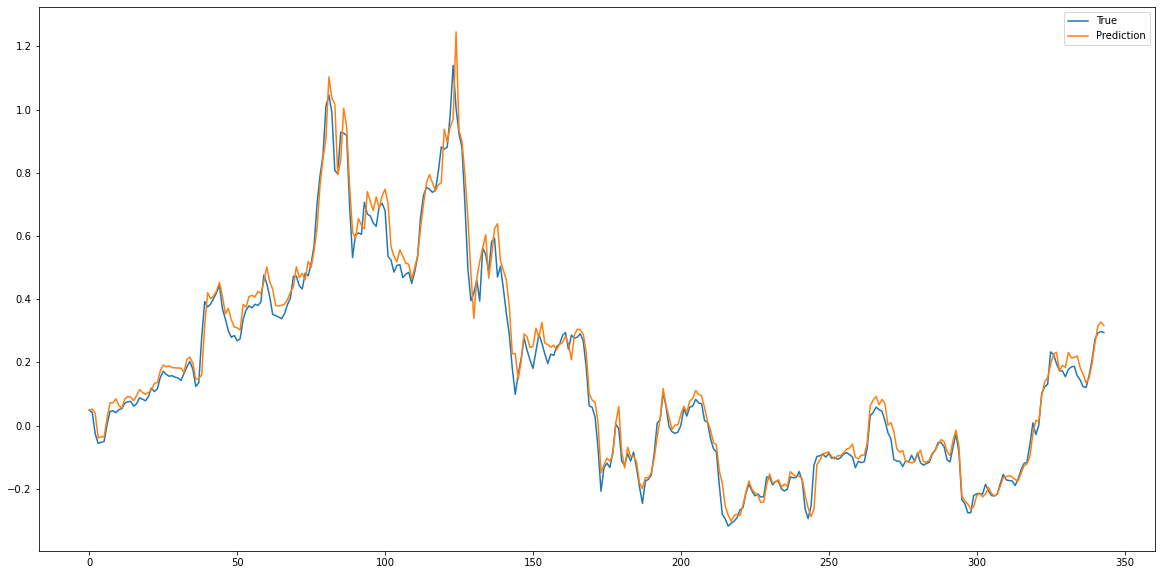

In [193]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [194]:
data.tail()

Date  priceUSD  transactions      size  sentbyaddress  \
3483  2020/01/29    9349.0        340402  706867.0         433958   
3484  2020/01/30    9394.0        332402  704883.0         416980   
3485  2020/01/31    9366.0        334290  770486.0         398021   
3486  2020/02/01    9393.0        303573  650769.0         338567   
3487  2020/02/02    9398.0        290736  684127.0         257655   

        difficulty      hashrate  mining_profitability  sentinusdUSD  \
3483  1.546610e+13  1.157542e+20                 0.163  8.336367e+09   
3484  1.546610e+13  1.253033e+20                 0.148  1.365361e+10   
3485  1.546610e+13  1.113635e+20                 0.153  1.126273e+10   
3486  1.546610e+13  1.201317e+20                 0.149  7.668679e+09   
3487  1.546610e+13  1.064910e+20                 0.159  6.486338e+09   

      transactionfeesUSD  ...  price3rsiUSD  price7rsiUSD  price14rsiUSD  \
3483               0.561  ...        93.577        80.644         73.588   
3484               0.555  ...        94.137        81.436         74.176   
3485               0.631  ...        87.140        79.116         73.100   
3486               0.541  ...        88.385        79.762         73.498   
3487               0.548  ...        88.689        79.897         73.576   

      price30rsiUSD  price90rsiUSD  price3rocUSD  price7rocUSD  price14rocUSD  \
3483         64.882         54.040        10.430         7.538          6.497   
3484         65.272         54.195         7.432        10.930          8.061   
3485         64.815         54.082         3.505        11.368          5.611   
3486         65.058         54.175         0.473        12.499          5.457   
3487         65.104         54.192         0.041        11.011          6.081   

      price30rocUSD  price90rocUSD  
3483         26.536          1.663  
3484         28.817          2.376  
3485         29.412          0.800  
3486         31.791          1.606  
3487         29.624          1.220  

[5 rows x 737 columns]

In [195]:
data_test=pd.read_csv('C:/Users/User/machine_learning/data/btc_testdata.csv')
data_test.head(5)

Date    Open*     High      Low  Close**        Volume    Market Cap
0  03-Feb-20  9344.68  9540.37  9248.63  9293.52  3.093410e+10  1.691269e+11
1  04-Feb-20  9292.84  9331.27  9112.81  9180.96  2.989318e+10  1.670936e+11
2  05-Feb-20  9183.42  9701.30  9163.70  9613.42  3.522206e+10  1.749834e+11
3  06-Feb-20  9617.82  9824.62  9539.82  9729.80  3.762882e+10  1.771183e+11
4  07-Feb-20  9726.00  9834.72  9726.00  9795.94  3.452272e+10  1.783394e+11

In [196]:
high_prices = data_test['High'].values
low_prices = data_test['Low'].values
mid_prices = (high_prices + low_prices) / 2
print(mid_prices)

[ 9394.5    9222.04   9432.5    9682.22   9780.36   9777.83   9989.915
  9975.165  9969.69  10298.    10286.895 10223.765 10107.995  9888.18
  9723.23   9897.16   9901.45   9575.56   9656.375  9649.48   9797.595
  9744.395  9478.88   9029.605  8755.045  8691.695  8687.57   8599.005
  8726.97   8803.295  8777.9    8949.65   9099.89   9026.98   8509.795
  7933.945  7975.855  7796.81   6394.735  4972.545  5375.15   5502.965
  4980.295  5176.63   5200.585  5783.355  6355.02   6155.48   6091.705
  6114.465  6600.045  6714.72   6663.21   6630.27   6292.67   6085.28
  6210.215  6439.34   6407.47   6842.085  6838.28   6787.715  6799.67
  7027.335  7282.325  7254.765  7260.27   7053.145  6857.995  6965.515
  6816.94   6876.19   6781.03   6844.975  7108.755  7179.605  7223.785
  7037.895  6884.495  7006.825  7286.685  7504.19   7581.515  7631.
  7737.51   7772.67   8328.9    8986.955  8857.89   8909.28   8999.375
  8800.965  8959.62   9189.09   9565.49   9881.955  9747.25   8995.345
  8703.895  

In [197]:
test_result = []
for index in range(len(mid_prices) - sequence_length):
    test_result.append(mid_prices[index: index + sequence_length])
print(test_result)

[array([ 9394.5  ,  9222.04 ,  9432.5  ,  9682.22 ,  9780.36 ,  9777.83 ,
        9989.915,  9975.165,  9969.69 , 10298.   , 10286.895, 10223.765,
       10107.995,  9888.18 ,  9723.23 ,  9897.16 ,  9901.45 ,  9575.56 ,
        9656.375,  9649.48 ,  9797.595,  9744.395,  9478.88 ,  9029.605,
        8755.045,  8691.695,  8687.57 ,  8599.005,  8726.97 ,  8803.295,
        8777.9  ,  8949.65 ,  9099.89 ,  9026.98 ,  8509.795,  7933.945,
        7975.855,  7796.81 ,  6394.735,  4972.545,  5375.15 ,  5502.965,
        4980.295,  5176.63 ,  5200.585,  5783.355,  6355.02 ,  6155.48 ,
        6091.705,  6114.465,  6600.045]), array([ 9222.04 ,  9432.5  ,  9682.22 ,  9780.36 ,  9777.83 ,  9989.915,
        9975.165,  9969.69 , 10298.   , 10286.895, 10223.765, 10107.995,
        9888.18 ,  9723.23 ,  9897.16 ,  9901.45 ,  9575.56 ,  9656.375,
        9649.48 ,  9797.595,  9744.395,  9478.88 ,  9029.605,  8755.045,
        8691.695,  8687.57 ,  8599.005,  8726.97 ,  8803.295,  8777.9  ,
        

In [198]:
test_result = normalize_windows(test_result)

x_test_plus = test_result[:, :-1]
print(x_test_plus)
x_test_plus = np.reshape(x_test_plus, (x_test_plus.shape[0], x_test_plus.shape[1], 1))
y_test_plus = test_result[:, -1]

x_test_plus.shape

9394.5
[ 9394.5    9222.04   9432.5    9682.22   9780.36   9777.83   9989.915
  9975.165  9969.69  10298.    10286.895 10223.765 10107.995  9888.18
  9723.23   9897.16   9901.45   9575.56   9656.375  9649.48   9797.595
  9744.395  9478.88   9029.605  8755.045  8691.695  8687.57   8599.005
  8726.97   8803.295  8777.9    8949.65   9099.89   9026.98   8509.795
  7933.945  7975.855  7796.81   6394.735  4972.545  5375.15   5502.965
  4980.295  5176.63   5200.585  5783.355  6355.02   6155.48   6091.705
  6114.465  6600.045]
9222.04
[ 9222.04   9432.5    9682.22   9780.36   9777.83   9989.915  9975.165
  9969.69  10298.    10286.895 10223.765 10107.995  9888.18   9723.23
  9897.16   9901.45   9575.56   9656.375  9649.48   9797.595  9744.395
  9478.88   9029.605  8755.045  8691.695  8687.57   8599.005  8726.97
  8803.295  8777.9    8949.65   9099.89   9026.98   8509.795  7933.945
  7975.855  7796.81   6394.735  4972.545  5375.15   5502.965  4980.295
  5176.63   5200.585  5783.355  6355.02   6

[9649.48  9797.595 9744.395 9478.88  9029.605 8755.045 8691.695 8687.57
 8599.005 8726.97  8803.295 8777.9   8949.65  9099.89  9026.98  8509.795
 7933.945 7975.855 7796.81  6394.735 4972.545 5375.15  5502.965 4980.295
 5176.63  5200.585 5783.355 6355.02  6155.48  6091.705 6114.465 6600.045
 6714.72  6663.21  6630.27  6292.67  6085.28  6210.215 6439.34  6407.47
 6842.085 6838.28  6787.715 6799.67  7027.335 7282.325 7254.765 7260.27
 7053.145 6857.995 6965.515]
9797.595000000001
[9797.595 9744.395 9478.88  9029.605 8755.045 8691.695 8687.57  8599.005
 8726.97  8803.295 8777.9   8949.65  9099.89  9026.98  8509.795 7933.945
 7975.855 7796.81  6394.735 4972.545 5375.15  5502.965 4980.295 5176.63
 5200.585 5783.355 6355.02  6155.48  6091.705 6114.465 6600.045 6714.72
 6663.21  6630.27  6292.67  6085.28  6210.215 6439.34  6407.47  6842.085
 6838.28  6787.715 6799.67  7027.335 7282.325 7254.765 7260.27  7053.145
 6857.995 6965.515 6816.94 ]
9744.395
[9744.395 9478.88  9029.605 8755.045 8691.69

 18280.92  18255.185]
12939.34
[12939.34  12884.305 13015.41  13119.62  13023.84  13410.255 13384.975
 13296.055 13393.86  13742.87  13745.205 13525.74  13655.21  13899.62
 14904.245 15565.14  15080.15  15190.715 15325.335 15287.645 15603.135
 15919.885 16227.665 16033.5   15958.32  16348.445 17173.73  17873.43
 17751.05  18269.515 18690.49  18180.175 18356.115 18738.465 18986.06
 17608.66  16985.72  17382.295 17921.375 18963.79  19083.95  18828.025
 19245.985 19104.295 18875.32  19144.195 19171.485 18776.715 18280.92
 18255.185 17943.99 ]
12884.305
[12884.305 13015.41  13119.62  13023.84  13410.255 13384.975 13296.055
 13393.86  13742.87  13745.205 13525.74  13655.21  13899.62  14904.245
 15565.14  15080.15  15190.715 15325.335 15287.645 15603.135 15919.885
 16227.665 16033.5   15958.32  16348.445 17173.73  17873.43  17751.05
 18269.515 18690.49  18180.175 18356.115 18738.465 18986.06  17608.66
 16985.72  17382.295 17921.375 18963.79  19083.95  18828.025 19245.985
 19104.295 18875.32 

 33330.44  31081.49 ]
16348.445
[16348.445 17173.73  17873.43  17751.05  18269.515 18690.49  18180.175
 18356.115 18738.465 18986.06  17608.66  16985.72  17382.295 17921.375
 18963.79  19083.95  18828.025 19245.985 19104.295 18875.32  19144.195
 19171.485 18776.715 18280.92  18255.185 17943.99  18482.795 19057.935
 19158.905 19302.425 20378.615 22438.67  22819.205 23456.165 23678.685
 23109.675 23110.25  23413.57  23272.97  24086.885 25620.38  27105.805
 26798.375 26679.01  28148.915 28723.435 29202.11  31123.15  33330.44
 31081.49  32329.39 ]
17173.73
[17173.73  17873.43  17751.05  18269.515 18690.49  18180.175 18356.115
 18738.465 18986.06  17608.66  16985.72  17382.295 17921.375 18963.79
 19083.95  18828.025 19245.985 19104.295 18875.32  19144.195 19171.485
 18776.715 18280.92  18255.185 17943.99  18482.795 19057.935 19158.905
 19302.425 20378.615 22438.67  22819.205 23456.165 23678.685 23109.675
 23110.25  23413.57  23272.97  24086.885 25620.38  27105.805 26798.375
 26679.01  28148

 37442.335 39492.47 ]
23456.165
[23456.165 23678.685 23109.675 23110.25  23413.57  23272.97  24086.885
 25620.38  27105.805 26798.375 26679.01  28148.915 28723.435 29202.11
 31123.15  33330.44  31081.49  32329.39  35196.865 38335.78  39392.69
 40208.615 38702.41  34448.065 34633.255 35092.315 38417.485 37118.65
 36748.96  35395.835 36091.565 36912.85  34974.405 32901.715 31382.61
 32427.07  32025.35  33445.265 31912.41  30965.585 31940.76  35235.535
 33887.45  33279.255 33511.22  34693.05  36462.085 37454.84  37442.335
 39492.47  38533.995]
23678.684999999998
[23678.685 23109.675 23110.25  23413.57  23272.97  24086.885 25620.38
 27105.805 26798.375 26679.01  28148.915 28723.435 29202.11  31123.15
 33330.44  31081.49  32329.39  35196.865 38335.78  39392.69  40208.615
 38702.41  34448.065 34633.255 35092.315 38417.485 37118.65  36748.96
 35395.835 36091.565 36912.85  34974.405 32901.715 31382.61  32427.07
 32025.35  33445.265 31912.41  30965.585 31940.76  35235.535 33887.45
 33279.255 33

(419, 50, 1)

In [199]:
# model = Sequential()

# model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

# model.add(LSTM(64, return_sequences=False))

# model.add(Dense(1, activation='linear'))

# model.compile(loss='mse', optimizer='rmsprop')

# model.summary()

start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

model.fit(x_train, y_train,
    validation_data=(x_test_plus, y_test_plus),
    batch_size=10,
    epochs=20,
    callbacks=[
        TensorBoard(log_dir='logs/%s' % (start_time)),
        ModelCheckpoint('./models/%s_eth.h5' % (start_time), monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='auto')
])

Epoch 1/20
309/310 [============================>.] - ETA: 0s - loss: 0.0559- ETA: 0s - loss: 0.
Epoch 00001: val_loss improved from inf to 0.00203, saving model to ./models\2021_05_18_17_41_10_eth.h5
310/310 [==============================] - 5s 16ms/step - loss: 0.0559 - val_loss: 0.0020
Epoch 2/20
309/310 [============================>.] - ETA: 0s - loss: 0.0412
Epoch 00002: val_loss did not improve from 0.00203
310/310 [==============================] - 5s 15ms/step - loss: 0.0419 - val_loss: 0.0029
Epoch 3/20
310/310 [==============================] - ETA: 0s - loss: 0.0399
Epoch 00003: val_loss did not improve from 0.00203
310/310 [==============================] - 5s 16ms/step - loss: 0.0399 - val_loss: 0.0024
Epoch 4/20
310/310 [==============================] - ETA: 0s - loss: 0.0415
Epoch 00004: val_loss did not improve from 0.00203
310/310 [==============================] - 5s 15ms/step - loss: 0.0415 - val_loss: 0.0026
Epoch 5/20
307/310 [============================>.] - E

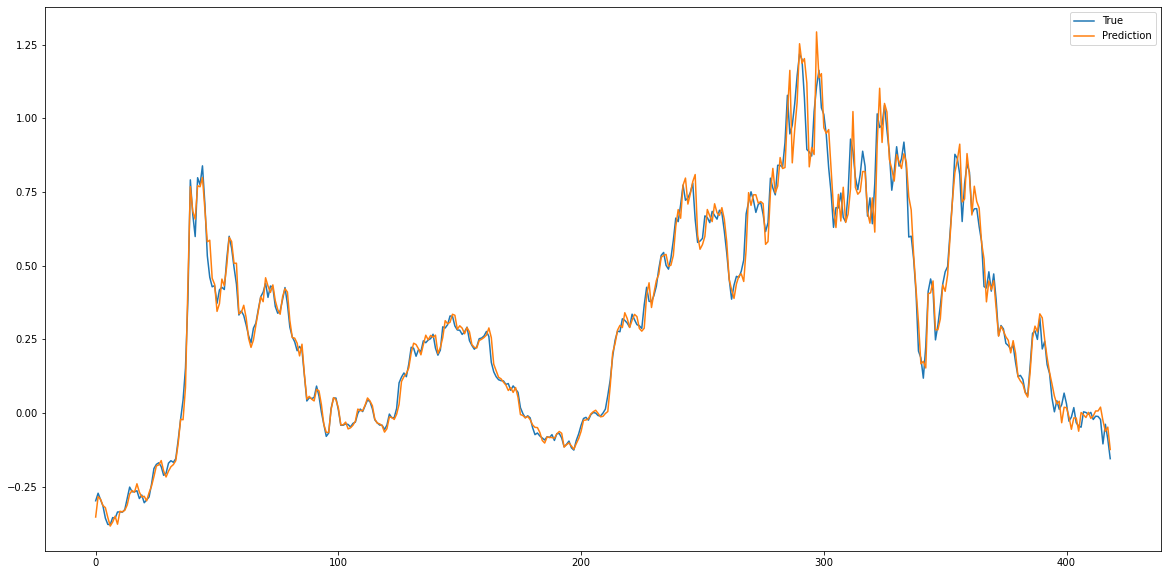

In [200]:
pred_plus = model.predict(x_test_plus)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test_plus, label='True')
ax.plot(pred_plus, label='Prediction')
ax.legend()
plt.show()